In [1]:
import torch
from mlp import make_dataset, CharacterLevelMLP
import matplotlib.pyplot as plt
from torch.optim import Adam
from pathlib import Path
from torch.nn.functional import cross_entropy
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
names_file = Path("./names.txt")
X , Y, itos = make_dataset(names_file)

In [3]:
train_X, eval_X, train_Y, eval_Y = train_test_split(X,Y,test_size=0.2)

In [4]:
val_X, test_X, val_Y, test_Y = train_test_split(eval_X,eval_Y,test_size=0.5)

In [5]:
EPOCHS = 1000
lre = torch.linspace(-3, 0, EPOCHS)
lrn = 10**lre
LEARNING_RATE = 0.1520


# ================================

C = torch.randn((27, 2))
W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

parameters = [C,W1,b1,W2,b2]
    
# ================================
    
# mlp_network = CharacterLevelMLP()

# adam = Adam(mlp_network.parameters(), lr=LEARNING_RATE)
# mlp_network.train()

# ================================

train_steps = []
losses = []

eval_steps = []
eval_losses = []

for i in range(EPOCHS):
    
    for p in parameters:
        p.requires_grad = True
    # Minibatch sampling
    random_index = torch.randint(0,train_X.shape[0],(32,))
    
    X_batch = train_X[random_index]
    Y_batch = train_Y[random_index]
    
    embeddings = C[X_batch]
    hidden_dim = embeddings.view((embeddings.shape[0], 6)) @ W1 + b1
    logits = hidden_dim @ W2 + b2
    # logits = mlp_network(X_batch)
    
    loss = cross_entropy(logits, Y_batch)
    losses.append(loss.item())
    train_steps.append(i)
        
    for p in parameters:
        p.grad = None
    # Clear gradients from previous iteration
    # adam.zero_grad()
        
    loss.backward()
    
    # learning_rate = lrn[i]
    for p in parameters:
        p.data += -LEARNING_RATE * p.grad
    # Update parameters
    # adam.step()
    
    if i%10 == 0:
        # Disable params grads
        for p in parameters:
            p.requires_grad = False
        
        embeddings = C[val_X]
        hidden_dim = embeddings.view((embeddings.shape[0], 6)) @ W1 + b1
        logits = hidden_dim @ W2 + b2
        # logits = mlp_network(X_batch)
        
        loss = cross_entropy(logits, val_Y)
        eval_losses.append(loss.item())
        eval_steps.append(i)
            
        
    
    

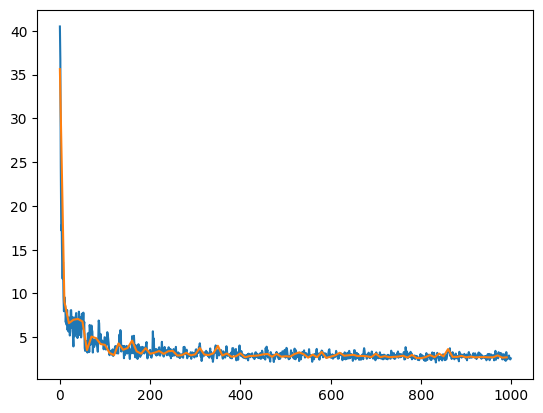

In [6]:
plt.plot(losses)
plt.plot(eval_steps,eval_losses)

In [7]:
for p in parameters:
    p.requires_grad = False

embeddings = C[test_X]
hidden_dim = embeddings.view((embeddings.shape[0], 6)) @ W1 + b1
logits = hidden_dim @ W2 + b2
# logits = mlp_network(X_batch)

test_loss = cross_entropy(logits, test_Y)
test_loss

tensor(2.7834)

Text(0.5, 1.0, 'Alphabet Embeddings')

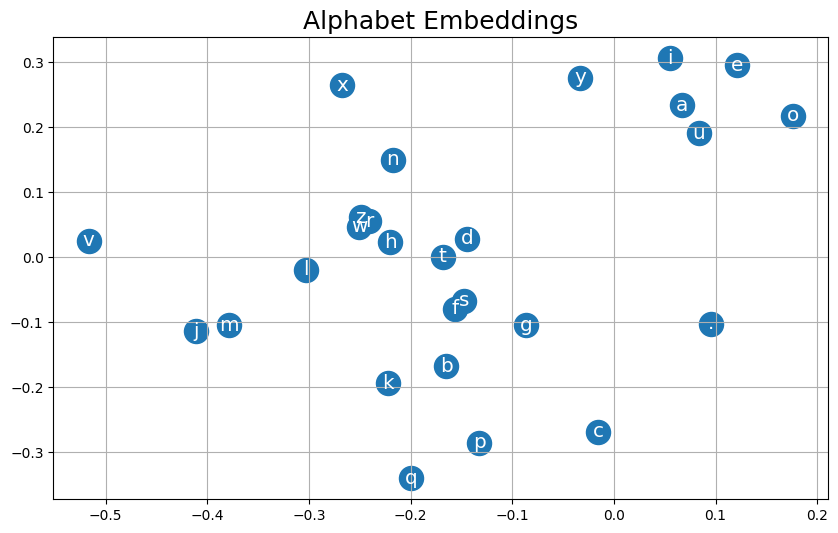

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(C[:,0],C[:,1], s=300)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item() ,itos[i], ha="center",va="center", color="white",size="x-large")
plt.grid(which="major")
plt.title("Alphabet Embeddings", size=18)